# Cleaning and analyzing the Star Wars survey

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that Episode 5: “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which anyone can download from their [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) repository.

For this project, we'll be cleaning and exploring the data set in Jupyter notebook. The following tasks have been stated:
* What Episode is the most favourite one for the survey participants?
* What is the difference in Episodes' ranking among different groups (gender/age/fans etc)?

Based on the analysis, following conclusions have been drawn:

* **Episode 5** is the most favourite one for the survey participants, as it was expected be FiveThirtyEight.
* Older Episodes (4-6) are generally ranked higher than newer ones (1-3), but it is not the case for not fans of the francise and people with the age higher than 60.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1000
png_renderer.height = 500

plt.style.use('seaborn-dark')
# Set pandas display option
pd.set_option('display.max_columns', None)

## Data exploration

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

In [4]:
display(star_wars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

None

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Data cleaning

In [7]:
# Transform column into boolean type

mapping_dict = {'Yes': True,
               'No': False,}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping_dict)

# Check
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping_dict)

# Check
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [9]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [10]:
# Show columns to modify
star_wars[star_wars.columns[3:9]]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
...,...,...,...,...,...,...
1181,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1182,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [11]:
# Convert data to boolean type
for col in star_wars[star_wars.columns[3:9]]:
    mapping_dict_nan = {star_wars.loc[0, col]: True,
               np.nan: False}
    star_wars[col] = star_wars[col].map(mapping_dict_nan)

In [12]:
# Check
star_wars[star_wars.columns[3:9]]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [13]:
def ren_col(df, string, first_col, last_col):
    """Takes string that goes before the number in the column name and first and last columns' indexes 
    in a subsequent columns list, returns renamed columns according to the indicated string."""
    for i, col in enumerate(df[df.columns[first_col:last_col]]):
        df.rename({col: string + str(i+1)},
                         axis=1, 
                         inplace=True)

In [14]:
# Rename each of these columns to seen_1, seen_2 etc
ren_col(star_wars, 'seen', 3, 9)
#Check
star_wars.columns[3:9]

Index(['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6'], dtype='object')

In [15]:
# Columns after the cleaning
star_wars[star_wars.columns[3:9]]

,seen1,seen2,seen3,seen4,seen5,seen6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [16]:
# Show columns to modify
star_wars[star_wars.columns[9:15]]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In these columns 1.0 means that the movie is the most favourite and 6.0 corresponds to the least favourite one. First column `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film` corresponds to Episode I, `Unnamed:10` to Episode II etc.

In [17]:
star_wars[star_wars.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [18]:
# Rename these columns to ranking_1, ranking_2 etc
ren_col(star_wars, 'ranking_', 9, 15)

#Check
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Data analysis

The lowest value of `ranking` means the most favourite movie among all.

Text(0.5, 0, 'Place')

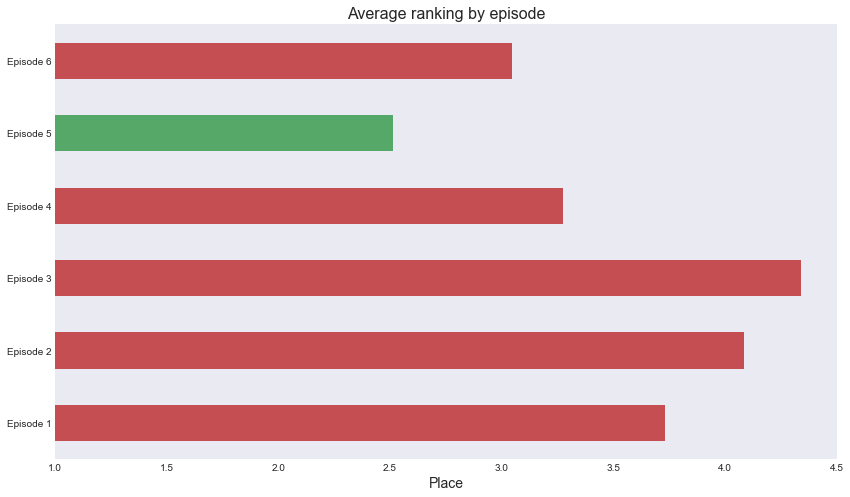

In [19]:
# Calculate mean of "ranking" columns
ran_mean = star_wars[star_wars.columns[9:15]].mean()

# Identify color palette
colors_deep = sns.color_palette('deep')

# Rename index
ran_mean.index = ran_mean.index.str.replace('ranking_', 'Episode ')

# Plot the results
color_map = [colors_deep[3], colors_deep[3], colors_deep[3], colors_deep[3], colors_deep[2], colors_deep[3]]
plt.figure(figsize=(14,8))
ran_mean.plot(kind='barh', color=color_map, xlim=(1,4.5))
plt.title('Average ranking by episode', fontsize=16)
plt.xlabel('Place', fontsize=14)

Our main assumption that **Episode 5** is the coolest one is verified! **Episodes 6 and 4** also have a high ranking. These 3 episodes are the first ones to be released (the original trology). 

Text(0.5, 0, 'Views')

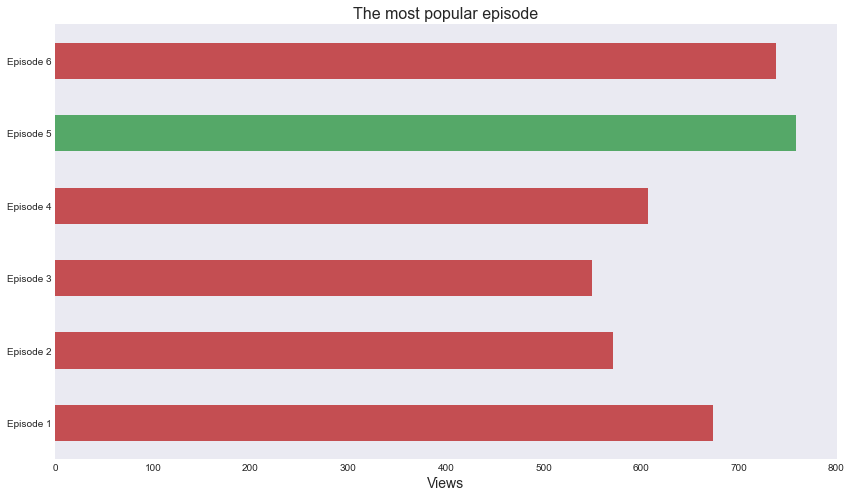

In [20]:
# Caclulate mean of "seen" columns
seen_sum = star_wars[star_wars.columns[3:9]].sum(axis=0)

# Rename index
seen_sum.index = seen_sum.index.str.replace('seen', 'Episode ')

# Plot the results
plt.figure(figsize=(14,8))
seen_sum.plot(kind='barh', color=color_map, xlim=(0,800))
plt.title('The most popular episode', fontsize=16)
plt.xlabel('Views', fontsize=14)

There is not big difference between the views among episodes. **Episodes 5, 6 and 1** are the most viewed once.

Text(109.5, 0.5, '')

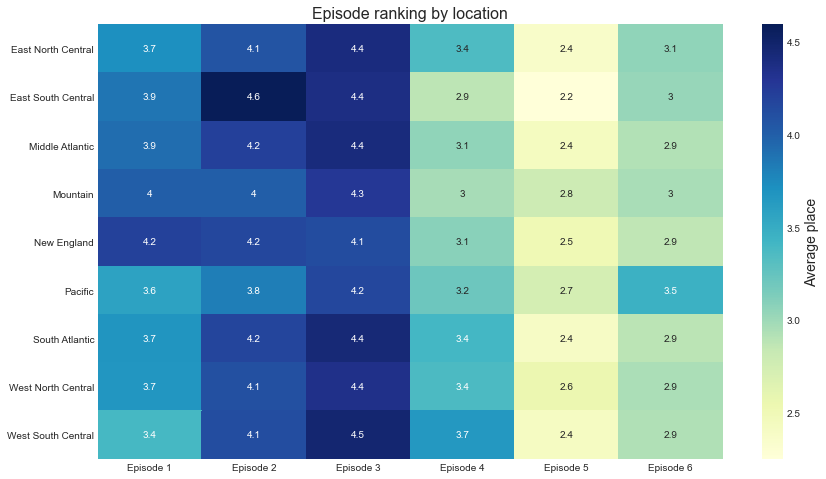

In [21]:
# Calculate rankings by location
loc_rankings = star_wars.groupby('Location (Census Region)').mean().iloc[:,8:14]

# Rename columns
ren_col(loc_rankings, 'Episode ', 0, 6)

# Create a heatmap to graphically represent the results 
plt.figure(figsize=(14,8))
ax = sns.heatmap(loc_rankings, cmap='YlGnBu', annot=True, cbar_kws={'label': 'Average place'})
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.title('Episode ranking by location', fontsize=16)
plt.ylabel('')

As expected, **Episode 5** is also the most favourite in all the locations. Regarding other episodes results are vary from region to region. `Pacific` and `West South Central` zone ranks **Episode 6 and 4** quite low (very close to **Episode 1**).

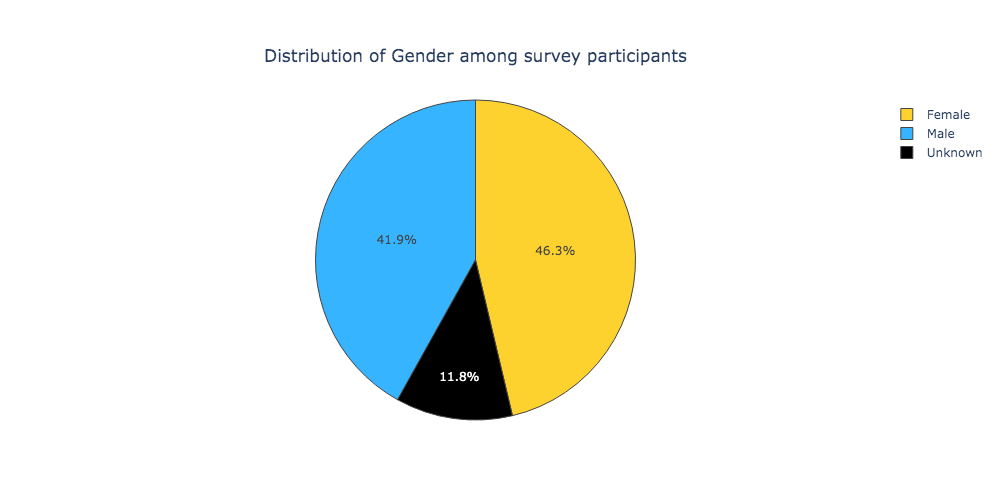

In [22]:
# Fill missing values
star_wars["Gender"].fillna('Unknown', inplace=True)

gender_counts = star_wars["Gender"].value_counts(dropna=False)

# Create an interactive plot with a distribution of genders
layout = go.Layout(
    title={
        'text':"Distribution of Gender among survey participants",
        'yanchor':'top',
        'xref':'paper',
        'x':0.5
    }
)

data = [
    go.Pie(
        labels= gender_counts.index,
        hoverinfo ='label + percent',
        values= gender_counts.values,
        marker= dict(
            colors= ['#fed22e','#37b4ff','black'],
            line= dict(width=1)
        ),
    )
]

fig = go.Figure(data= data, layout= layout)

# Choose renderer png to show the figure at Github
fig.show(renderer="png")

In [23]:
# Create filtered by groups datasets for a further analysis
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
no_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

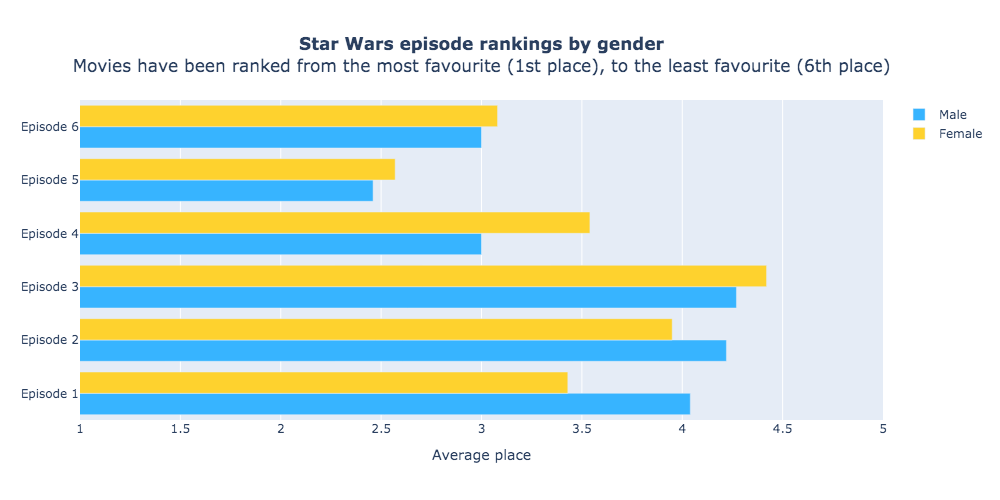

In [24]:
# Calculate ratings for males and females
males_mean = males[males.columns[9:15]].mean()
males_mean.index = males_mean.index.str.replace('ranking_', 'Episode ')
females_mean = females[females.columns[9:15]].mean()
females_mean.index = females_mean.index.str.replace('ranking_', 'Episode ')

layout = go.Layout(
    title={
        'text':"<b>Star Wars episode rankings by gender</b><br>"+
        "Movies have been ranked from the most favourite (1st place), to the least favourite (6th place)",
        'yanchor':'top',
        'xref':'paper',
        'x':0.5
    },
    xaxis=go.layout.XAxis(range=[1, 5],
                          title='Average place')
)

data = [
    go.Bar(
        y= males_mean.index,
        x= np.round(males_mean.values, decimals = 2),
        orientation='h',
        name='Male',
        hoverinfo='x',
        marker=dict(color='#37b4ff')
        ),
    go.Bar(
        y= females_mean.index,
        x= np.round(females_mean.values, decimals = 2),
        orientation='h',
        name='Female',
        hoverinfo='x',
        marker=dict(color='#fed22e')
        ),
]

fig = go.Figure(data= data, layout= layout)

# Choose renderer png to show the figure at Github
fig.show(renderer="png")

There is no big difference between Males and Females rankings. However, Females like **Episodes 1-2** more than Males and Males like **Episodes 3-6** more than Females.

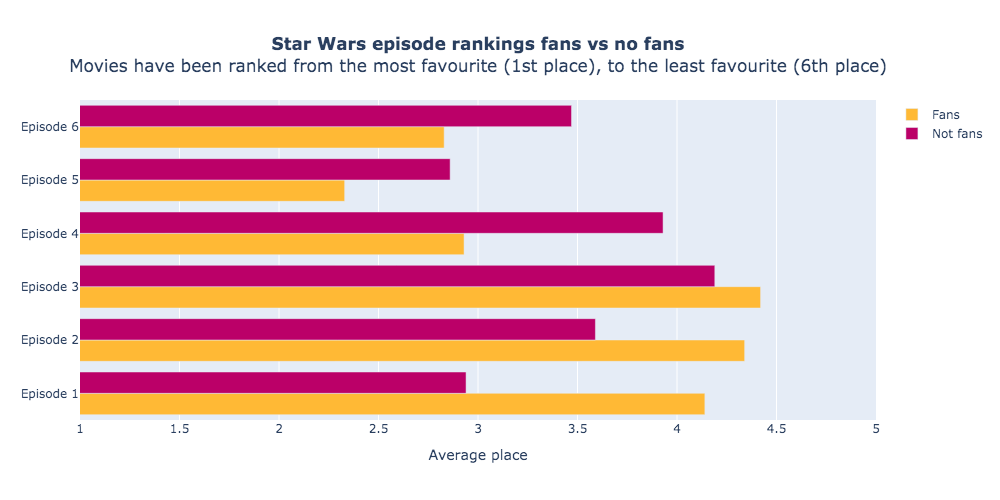

In [25]:
# Calculate rakings for males and females
fans_mean = fans[fans.columns[9:15]].mean()
fans_mean.index = fans_mean.index.str.replace('ranking_', 'Episode ')
no_fans_mean = no_fans[no_fans.columns[9:15]].mean()
no_fans_mean.index = no_fans_mean.index.str.replace('ranking_', 'Episode ')

layout = go.Layout(
    title={
        'text':"<b>Star Wars episode rankings fans vs no fans</b><br>"+
        "Movies have been ranked from the most favourite (1st place), to the least favourite (6th place)",
        'yanchor':'top',
        'xref':'paper',
        'x':0.5
    },
    xaxis=go.layout.XAxis(range=[1, 5],
                          title='Average place')
)

data = [
    go.Bar(
        y= fans_mean.index,
        x= np.round(fans_mean.values, decimals = 2),
        orientation='h',
        name='Fans',
        hoverinfo='x',
        marker=dict(color='#ffb935')
        ),
    go.Bar(
        y= no_fans_mean.index,
        x= np.round(no_fans_mean.values, decimals = 2),
        orientation='h',
        name='Not fans',
        hoverinfo='x',
        marker=dict(color='#bb0068')
        ),
]

fig = go.Figure(data= data, layout= layout)

# Choose renderer png to show the figure at Github
fig.show(renderer="png")

There is a big difference in rankings between `Fans` and `Not fans`. Even though **Episode 5** is the best ranked for both groups, fans prefer **Episodes 4-6** to **Episodes 1-3** while for `Not fans`' preference to older Episodes is not that evident. Since **Episodes 4-6** were the first one to be released, we can assume that fan base of Star Wars movies were born from them while more recent **Episodes 1-3** attracted new audience that is not considered itself as Star Wars fans.

In [26]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [27]:
# Create copy of original dataset with cleaned "Education"
edu = star_wars[(star_wars['Education'].notnull()) & (star_wars['Education'] != 'Less than high school degree')].copy()
edu['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Name: Education, dtype: int64

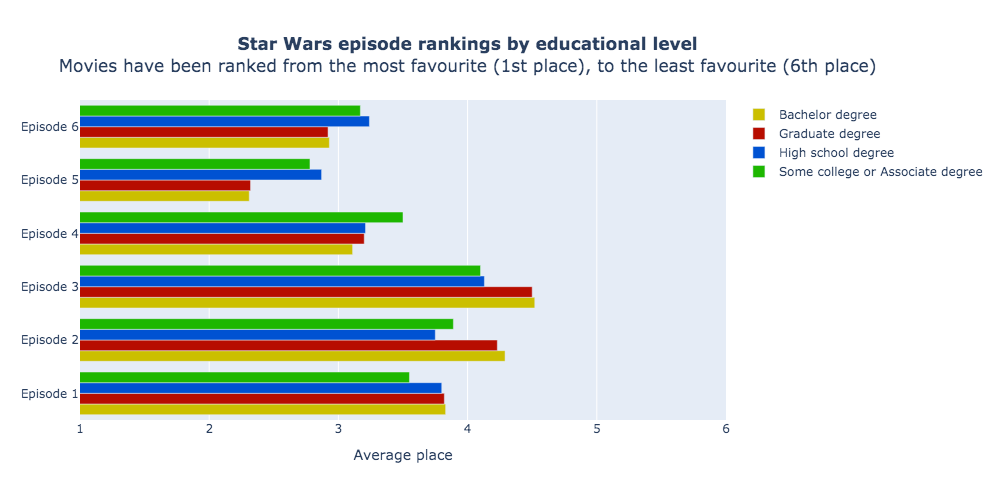

In [28]:
# Calculate rankings by Education
edu_rank = edu.groupby('Education').mean().iloc[:,8:14]
ren_col(edu_rank, 'Episode ', 0, 6)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=800,
    title={
        'text':"<b>Star Wars episode rankings by educational level</b><br>"+
        "Movies have been ranked from the most favourite (1st place), to the least favourite (6th place)",
        'yanchor':'top',
        'xref':'paper',
        'x':0.6
    },
    xaxis=go.layout.XAxis(range=[1, 6],
                          title='Average place')
)
data = []
colors = ['#cbbf00', '#b70d00', '#0052d2', '#1db700']
for i in range(4):
# data = [
    a = go.Bar(
        y= edu_rank.columns,
        x= np.round(edu_rank.values[i], decimals = 2),
        orientation='h',
        name=edu_rank.index[i],
        hoverinfo='x',
        marker=dict(color=colors[i])
        )
    data.append(a)

fig = go.Figure(data= data, layout= layout)

# Choose renderer png to show the figure at Github
fig.show(renderer="png")

Survey participants with `Bachelor` and `Graduate` degrees tend to like **Episodes 4-6** more than other educational groups and **Episodes 1-3** less. We can make an assumption that older people like older Episodes (4-6) more than younger ones. Let's verify this assumption.

In [29]:
star_wars['Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [30]:
# Create copy of original dataset with cleaned "Age"
age = star_wars[star_wars['Age'].notnull()].copy()
age['Age'] = age['Age'].map({'18-29': 'Young',
                   '30-44': 'Middle age',
                   '45-60': 'Senior',
                   '> 60': 'Elder'})

# Check
age['Age'].value_counts(dropna=False)

Senior        291
Elder         269
Middle age    268
Young         218
Name: Age, dtype: int64

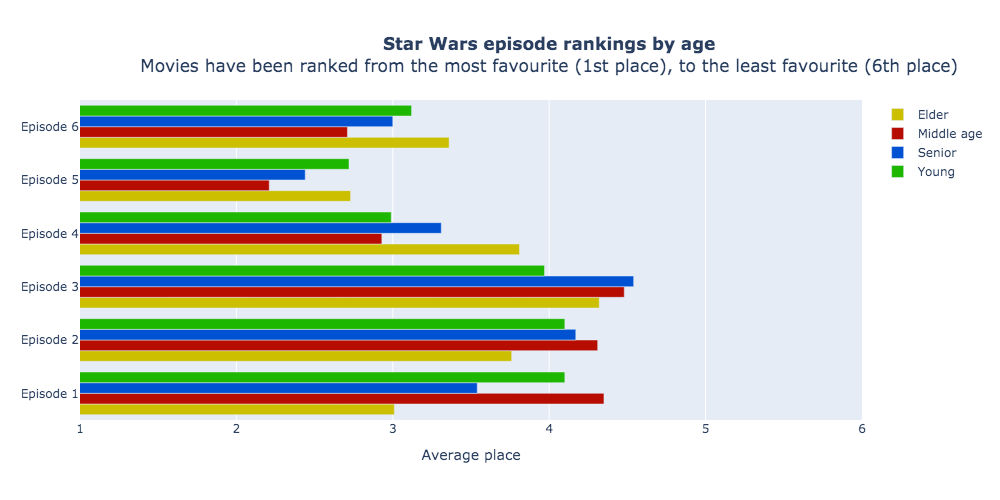

In [31]:
# Calculate rankings by Age
age_rank = age.groupby('Age').mean().iloc[:,8:14]
ren_col(age_rank, 'Episode ', 0, 6)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=800,
    title={
        'text':"<b>Star Wars episode rankings by age</b><br>"+
        "Movies have been ranked from the most favourite (1st place), to the least favourite (6th place)",
        'yanchor':'top',
        'xref':'paper',
        'x':0.6
    },
    xaxis=go.layout.XAxis(range=[1, 6],
                          title='Average place')
)
data = []
colors = ['#cbbf00', '#b70d00', '#0052d2', '#1db700']
for i in range(4):
# data = [
    a = go.Bar(
        y= age_rank.columns,
        x= np.round(age_rank.values[i], decimals = 2),
        orientation='h',
        name=age_rank.index[i],
        hoverinfo='x',
        marker=dict(color=colors[i])
        )
    data.append(a)


fig = go.Figure(data= data, layout= layout)

# Choose renderer png to show the figure at Github
fig.show(renderer="png")

Surprisingly, `Elder` people rank **Episode 1** higher than **Episodes 4 and 6**, and **Episode 2** similar to **Episode 5**. For other age categories general tendency of ranking older episodes higher than newer ones holds.

## Conclusions

As a result of the Star Wars Episodes survey analysis, following conclusions can be made:

* **Episode 5** “The Empire Strikes Back” is the most favourite one for the survey participants.
* Overall, **Episodes 4 and 6** are ranked higher than **Episodes 1-3**.
* Abovementioned tendency is held by all the American regions. However, in `Pacific` and `West South Central` **Episode 1** ranks very close to **Episodes 6 and 4** respectively.
* `Females` like **Episodes 1-2** more than `Males` and `Males` like **Episodes 3-6** more than `Females`.
* Star Wars `Fans` prefer **Episodes 4-6** to **Episodes 1-3** while `Not fans` rank **Episodes 1 and 2** higher than **Episode 4**.
* `Elder` age category (more than 60 years old) is the only one that prefers one newer episode (**Episode 1**) to one older (**Episode 4**). All other age categories like older Episodes (4-6) much more than newer ones (1-3).